## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

Create 1 slide with informative visualization for each question. Explore data using SQL and Python but use Tableau for final visualization.

Don't limit your EDA to these 10 questions. Let's be creative :).

In [1]:
import psycopg2
import pandas as pd

host = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com'
port = "5432"
user = 'lhl_student'
pwd = 'lhl_student'
database = 'mid_term_project'

conn = psycopg2.connect(user = user,
                              password = pwd,
                              host = host,
                              port = port,
                              database = database)
def query(query, conn=conn):
    return pd.read_sql(query, conn)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [89]:
import numpy as np
import pandas as pd 
import seaborn as sns
import pylab
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from utils import traffic_percent_by_state, cumulative_percentage, calculateSpeed, otp

In [3]:
def nan_percent(df):
    nan_percentage = round(float(df.isna().sum()/df.count()*100))
    return print(f'{nan_percentage}% of values are NaN')

In [6]:
df_arr_delay = pd.read_csv('/media/einhard/Seagate Expansion Drive/lighthouse/midterm/data/arr_delay.csv')

In [7]:
df_arr_delay.describe()

,Unnamed: 0,arr_delay
count,1.592748e+07,1.561574e+07
mean,7.963742e+06,5.475932e+00
std,4.597869e+06,4.987401e+01
min,0.000000e+00,-1.290000e+03
25%,3.981871e+06,-1.500000e+01
50%,7.963742e+06,-6.000000e+00
75%,1.194561e+07,8.000000e+00
max,1.592748e+07,2.973000e+03


In [11]:
nan_percent(df_arr_delay)

2% of values are NaN


In [12]:
# Z-score calculates the distance from the mean for each observation
z = np.abs(stats.zscore(df_arr_delay.dropna()))
df_arr_delay_clean = df_arr_delay.dropna()[(z<3).all(axis=1)]

/home/einhard/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

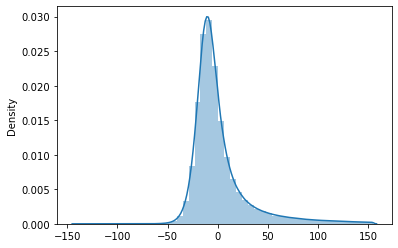

In [13]:
sns.distplot(df_arr_delay_clean)

/home/einhard/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

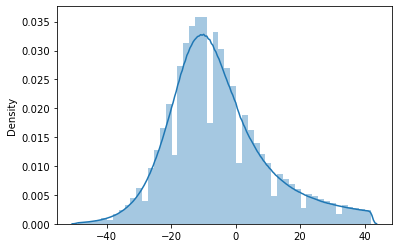

In [14]:
#find Q1, Q3, and interquartile range for each column
Q1 = df_arr_delay.dropna().quantile(q=.25)
Q3 = df_arr_delay.dropna().quantile(q=.75)
IQR = df_arr_delay.dropna().apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_arr_IQR = df_arr_delay.dropna()[~((df_arr_delay.dropna() < (Q1-1.5*IQR)) | (df_arr_delay.dropna() > (Q3+1.5*IQR))).any(axis=1)]

sns.distplot(df_arr_IQR)

In [15]:
stats.shapiro(df_arr_IQR), stats.shapiro(df_arr_delay_clean)

/home/einhard/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9392585754394531, pvalue=0.0),
 ShapiroResult(statistic=0.793079674243927, pvalue=0.0))

In [8]:
!pip install tqdm
from tqdm import tqdm
from tqdm import trange
import statsmodels.api as sm
import matplotlib.pyplot as plt

     |████████████████████████████████| 70 kB 3.5 MB/s 


In [18]:
df_arr_delayNoNaN = df_arr_delay.dropna()

In [33]:
df_arr_delayNoNaN.describe()

,arr_delay
count,1.561574e+07
mean,5.475932e+00
std,4.987401e+01
min,-1.290000e+03
25%,-1.500000e+01
50%,-6.000000e+00
75%,8.000000e+00
max,2.973000e+03


In [26]:
sampleMeans = []
for _ in trange(2000):
    sampleMean = np.mean(df_arr_delayNoNaN.sample(n=75))
    sampleMeans.append(sampleMean)

100%|██████████| 2000/2000 [19:56<00:00,  1.67it/s]


ShapiroResult(statistic=0.9487401843070984, pvalue=7.443520787235197e-26)
/home/einhard/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

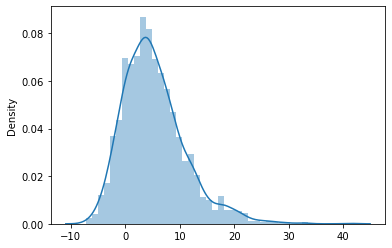

In [28]:
print(stats.shapiro(sampleMeans))
sns.distplot(sampleMeans)

In [32]:
pd.DataFrame(sampleMeans).describe()

,arr_delay
count,2000.000000
mean,5.270827
std,5.754027
min,-7.146667
25%,1.236667
50%,4.460000
75%,8.253333
max,41.146667


##### The Null Hypothesis is Rejected: data is *not* normally distributed

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [3]:
# Note this is ARRIVAL delays
fl_delays_month = pd.read_csv('/media/einhard/Seagate Expansion Drive/lighthouse/midterm/data/avg_arr_delay.csv')

In [8]:
fl_delays_month

,fl_date,avg_dekay,avg_weather_delay,month
0,2018-01-01,14.482766,3.631047,1
1,2018-01-02,11.243284,3.538177,1
2,2018-01-03,7.190095,2.426742,1
3,2018-01-04,2.634698,7.829098,1
4,2018-01-05,12.686591,6.293012,1
...,...,...,...,...
725,2019-12-27,1.737023,1.615828,12
726,2019-12-28,12.168997,4.177684,12
727,2019-12-29,9.077276,4.284338,12
728,2019-12-30,11.157203,4.075837,12


In [4]:
fl_delays_month.fl_date = pd.to_datetime(fl_delays_month.fl_date)
fl_delays_month['month'] = pd.DatetimeIndex(fl_delays_month.fl_date).month
fl_delays_month.groupby('month').mean().sort_values(by='avg_dekay', ascending=False)

,avg_dekay,avg_weather_delay
month,,
6,10.393455,3.907889
7,8.910038,4.557668
8,8.847962,3.653699
2,6.670706,4.052674
5,6.416833,3.958788
12,4.815971,2.931421
4,4.177950,2.838693
1,3.928195,4.206832
3,2.854581,2.292962


In [5]:
fl_delays_month.groupby('month').mean().sort_values(by='avg_weather_delay', ascending=False)

,avg_dekay,avg_weather_delay
month,,
7,8.910038,4.557668
1,3.928195,4.206832
2,6.670706,4.052674
5,6.416833,3.958788
6,10.393455,3.907889
8,8.847962,3.653699
9,1.585263,3.095946
12,4.815971,2.931421
4,4.177950,2.838693


In [6]:
fl_delays_month.groupby('month').median().sort_values(by='avg_dekay', ascending=False)

,avg_dekay,avg_weather_delay
month,,
6,9.712255,3.322608
8,8.202406,3.093451
7,8.013177,3.899555
2,7.015660,3.677336
5,5.039996,3.244522
12,2.741624,2.756699
1,2.444028,2.983258
4,1.662009,2.133740
3,1.560317,1.520966


In [7]:
fl_delays_month.groupby('month').median().sort_values(by='avg_weather_delay', ascending=False)

,avg_dekay,avg_weather_delay
month,,
7,8.013177,3.899555
2,7.015660,3.677336
6,9.712255,3.322608
5,5.039996,3.244522
8,8.202406,3.093451
1,2.444028,2.983258
12,2.741624,2.756699
9,0.353138,2.192522
4,1.662009,2.133740


### Explanation of above

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.<br>
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [83]:
import requests as re
import time
import foursquare
import json
import pandas as pd
import numpy as np
from pprint import pprint
from pandas import json_normalize
from IPython.display import JSON
import os
import seaborn as sns
import scipy.stats as stats


In [5]:
api_key = 'EP3H1FFZ10BYHBPG4LPH84VU6'

In [34]:
weather_delays = query("""SELECT * FROM flights ORDER BY random() group by fl_date LIMIT 100000""")

DatabaseError: Execution failed on sql 'SELECT * FROM flights ORDER BY random() group by fl_date LIMIT 100000': syntax error at or near "group"
LINE 1: SELECT * FROM flights ORDER BY random() group by fl_date LIM...
                                                ^


In [23]:
weather_delays.to_csv('/media/einhard/Seagate Expansion Drive/lighthouse/midterm/data/random100000')

In [6]:
weather_delays = pd.read_csv('/media/einhard/Seagate Expansion Drive/lighthouse/midterm/data/random100000.csv').drop('Unnamed: 0', axis=1)

In [7]:
weather_delays.origin.nunique()

374

In [20]:
weather_delays.fl_date = pd.DatetimeIndex(weather_delays.fl_date)

In [21]:
weather_delays

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-03-09,UA,UA,UA,647,UA,N78511,647,14771,SFO,...,2393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-28,AA,AA,AA,53,AA,N184US,53,11057,CLT,...,590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-04,DL,DL_CODESHARE,DL,5695,CP,N627CZ,5695,14747,SEA,...,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-13,DL,DL,DL,1224,DL,N917DN,1224,13303,MIA,...,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-20,G4,G4,G4,2124,G4,307NV,2124,14761,SFB,...,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-01-25,UA,UA,UA,1963,UA,N36447,1963,12892,LAX,...,1379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2019-12-05,UA,UA_CODESHARE,UA,4891,C5,N14177,4891,13342,MKE,...,725.0,0.0,0.0,92.0,0.0,0.0,NaN,NaN,NaN,NaN
99997,2019-02-24,NK,NK,NK,788,NK,N656NK,788,12889,LAS,...,1749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,2018-09-07,UA,UA_CODESHARE,UA,3816,ZW,N426AW,3816,13930,ORD,...,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
weather_delays500 = weather_delays.groupby(['dest_city_name','fl_date']).mean().sample(500)[['dep_delay','arr_delay']].reset_index().sort_values(by='fl_date', ascending=True).dropna()

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

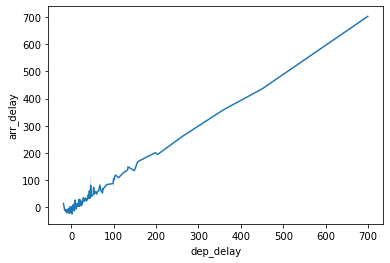

In [36]:
sns.lineplot(x=weather_delays500.dep_delay, y=weather_delays500.arr_delay)

In [32]:
weather_delays500.reset_index().drop('index', axis=1)

,dest_city_name,fl_date,dep_delay,arr_delay
0,"Minneapolis, MN",2018-01-01,28.000000,15.500000
1,"Portland, OR",2018-01-01,35.000000,27.666667
2,"Newport News/Williamsburg, VA",2018-01-05,24.000000,13.000000
3,"Colorado Springs, CO",2018-01-07,-1.000000,-8.000000
4,"Fort Myers, FL",2018-01-07,-2.666667,-19.333333
...,...,...,...,...
490,"Albuquerque, NM",2019-12-26,11.000000,0.000000
491,"Kalamazoo, MI",2019-12-26,-1.000000,-13.000000
492,"Salt Lake City, UT",2019-12-28,-5.000000,-32.500000
493,"Oakland, CA",2019-12-30,5.000000,-5.000000


In [ ]:
ll = 'Minneapolis, MN	'

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [ ]:
taxi_times = pd.read_csv('/media/einhard/Seagate Expansion Drive/lighthouse/midterm/data/taxi_times.csv').drop('Unnamed: 0', axis=1)
taxi_times.head()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

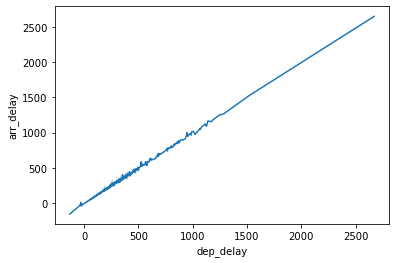

In [14]:
sns.lineplot(x=weather_delays.dep_delay, y=weather_delays.arr_delay)

#### **Task 6**: How many states cover 50% of US air traffic? 

In [27]:
def trafficPercentByState(df):
    '''
    Returns dataframe with total aircraft movements and percentage of totals
    '''
    df['dest_state'] = df.dest_city_name.str[-2:]
    df['origin_state'] = df.origin_city_name.str[-2:]
    movements = df[['origin_state', 'fl_date']].groupby('origin_state').count()['fl_date'] + df[['dest_state', 'fl_date']].groupby('dest_state').count()['fl_date']
    movements = pd.DataFrame(movements)
    movements['percentage_of_total'] = movements.fl_date/movements.fl_date.sum()*100
    return movements

def trafficCumulativePercentage(df, threshold):
    ''' 
    Returns airports that cunmulatively consist of threshold percent of total traffic
    '''
    traffic = traffic_percent_by_state(df).sort_values(by='percentage_of_total',   ascending=False)
    return traffic[traffic.cumsum().percentage_of_total <= threshold].rename({'fl_date':'total_movements'}, axis=1)


In [38]:
total_traffic_all = cumulative_percentage(weather_delays, 100)

In [36]:
total_traffic

,total_movements,percentage_of_total
origin_state,,
CA,22168,11.0840
TX,19658,9.8290
FL,14341,7.1705
IL,12697,6.3485
GA,10532,5.2660
NY,10440,5.2200
NC,9119,4.5595


In [39]:
import plotly.express as px

fig = px.choropleth(locations=total_traffic_all.index, locationmode="USA-states", color=total_traffic_all.percentage_of_total, scope="usa")
fig.show()

In [40]:
# Add outline of other states
total_traffic50 = cumulative_percentage(weather_delays, 50)
fig = px.choropleth(locations=total_traffic50.index, locationmode="USA-states", color=total_traffic50.percentage_of_total, scope="usa")
fig.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [90]:
def calculateSpeed(df):
    '''
    Returns column with speed values in MPH
    '''
    df['speed'] = df.distance/df.air_time*60
    return df

def otp(df):
    '''
    Returns OTP binary, where 0 = on-time or early departure, else 1
    '''
    df = calculateSpeed(df)
    df['OTP'] = np.where(df.dep_delay <= 0, 0,1)
    return df

In [91]:
otp(weather_delays)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,dest_state,origin_state,speed,OTP
0,2019-03-09,UA,UA,UA,647,UA,N78511,647,14771,SFO,...,NaN,NaN,NaN,NaN,NaN,NaN,FL,CA,572.031873,1
1,2019-11-28,AA,AA,AA,53,AA,N184US,53,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,FL,NC,459.740260,0
2,2019-04-04,DL,DL_CODESHARE,DL,5695,CP,N627CZ,5695,14747,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,CA,WA,383.119266,1
3,2019-04-13,DL,DL,DL,1224,DL,N917DN,1224,13303,MIA,...,NaN,NaN,NaN,NaN,NaN,NaN,GA,FL,434.634146,0
4,2019-05-20,G4,G4,G4,2124,G4,307NV,2124,14761,SFB,...,NaN,NaN,NaN,NaN,NaN,NaN,NY,FL,443.720930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-01-25,UA,UA,UA,1963,UA,N36447,1963,12892,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,TX,CA,527.006369,0
99996,2019-12-05,UA,UA_CODESHARE,UA,4891,C5,N14177,4891,13342,MKE,...,0.0,0.0,NaN,NaN,NaN,NaN,NJ,WI,453.125000,1
99997,2019-02-24,NK,NK,NK,788,NK,N656NK,788,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,MI,NV,532.690355,0
99998,2018-09-07,UA,UA_CODESHARE,UA,3816,ZW,N426AW,3816,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,IL,IL,229.411765,0


In [95]:
weather_delays[weather_delays.OTP.isin([0])].speed.mean()

395.67447516699593

In [96]:
weather_delays[weather_delays.OTP.isin([1])].speed.mean()

405.10464474525827

In [94]:
stat, p_value = stats.ttest_ind(weather_delays[weather_delays.OTP.isin([0])].speed,weather_delays[weather_delays.OTP.isin([1])].speed, nan_policy='omit')
if p_value < 0.05:
    print(f'Hypothesis rejected; aircraft speeds are not equal with delays present. P-value: {p_value}')
else:
    print(f'Delays have no effect on aircraft speed')

Hypothesis rejected; aircraft speeds are not equal with delays present. P-value: 4.256557630507671e-79


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?